# Librerias utilizadas

In [ ]:
pip install padasip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import wget   #Jupyter
from scipy.io import loadmat
from IPython.display import clear_output
from os import path
#import padasip as pa
from scipy.ndimage.interpolation import shift

# Descarga de datasets

In [ ]:
# Collab
!wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true
!wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true
!wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true
!wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true
clear_output()

# Jupyter
#cont_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true'
#if not path.exists('Contaminated_Data.mat'):
#    cont_data_file = wget.download(cont_data_url)
#else:
#    print('Already Downloaded File')
#    cont_data_file = 'Contaminated_Data.mat'
#pure_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true'
#if not path.exists('Pure_Data.mat'):
#    pure_data_file = wget.download(pure_data_url)
#else:
#    print('Already Downloaded File')
#    pure_data_file = 'Pure_Data.mat'
#heog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true'
#if not path.exists('HEOG.mat'):
#    heog_file = wget.download(heog_url)
#else:
#    print('Already Downloaded File')
#    heog_file = 'HEOG.mat'
#veog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true'
#if not path.exists('VEOG.mat'):
#    veog_file = wget.download(veog_url)
#else:
#    print('Already Downloaded File')
#    veog_file = 'VEOG.mat'

# Visualizacion de datos

In [ ]:
def RemoveKeys(dict_):
    new_dict = dict_.copy()
    new_dict.pop('__header__')
    new_dict.pop('__version__')
    new_dict.pop('__globals__')
    return  new_dict

def AddPlot(signal, n_rows, n_cols, index, title):
    plt.subplot(n_rows,n_cols,index)
    plt.title(title)
    plt.plot(signal)
    plt.grid(True)

## EEG pura

In [ ]:
# Collab
clean_dict = loadmat("Pure_Data.mat?raw=true")
# Jupyter
#clean_dict = loadmat(pure_data_file)

new_clean = RemoveKeys(clean_dict)
print(new_clean.keys())
clean_list = [new_clean[eeg] for eeg in new_clean.keys()]
c_shapes = [ clean_list[i].shape[1] for i in range(0,len(clean_list))]
print("len clean_list: " + str( len(clean_list) ) )
print("numero de canales eeg por elemento de la lista: "+str( clean_list[0].shape[0] ))
print("len de clean mas larga: "+str( np.amax(c_shapes) ))
print("len de clean mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(clean_list)):
    AddPlot(clean_list[i][0], 9, 6, i+1, "FP1 "+str(i+1))
plt.show()

## VEOG

In [ ]:
# Collab
veog_dict = loadmat("VEOG.mat?raw=true")
# Jupyter
#veog_dict = loadmat(veog_file)

keys = [veog_dict.keys()]
new_veog = RemoveKeys(veog_dict)
print(new_veog.keys())
veog_list = [new_veog[veog] for veog in new_veog.keys()]
v_shapes = [ veog_list[i].shape[1] for i in range(0,len(veog_list))]
print("len veog_list: " + str( len(veog_list) ) )
print("len de veog mas larga: "+str( np.amax(v_shapes) ))
print("len de veog mas corta: "+str( np.amin(v_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(veog_list)):
    AddPlot(veog_list[i][0], 9, 6, i+1, "veog "+str(i+1))
plt.show()


## HEOG

In [ ]:
# Collab
heog_dict = loadmat("HEOG.mat?raw=true")
# Jupyter
#heog_dict = loadmat(heog_file)

new_heog = RemoveKeys(heog_dict)
print(new_heog.keys())
heog_list = [new_heog[heog] for heog in new_heog.keys()]
h_shapes = [ heog_list[i].shape[1] for i in range(0,len(heog_list))]
print("len heog_list: " + str( len(heog_list) ) )
print("len de heog mas larga: "+str( np.amax(h_shapes) ))
print("len de heog mas corta: "+str( np.amin(h_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(heog_list)):
    AddPlot(heog_list[i][0], 9, 6, i+1, "heog "+str(i+1))
plt.show()

## EEG Contaminada

In [ ]:
# Collab
cont_data_dict = loadmat("Contaminated_Data.mat?raw=true")
# Jupyter
#cont_data_dict = loadmat(cont_data_file)

new_cont_data = RemoveKeys(cont_data_dict)
print(new_cont_data.keys())
cont_data_list = [new_cont_data[cont_data] for cont_data in new_cont_data.keys()]
c_shapes = [ cont_data_list[i].shape[1] for i in range(0,len(cont_data_list))]
print("len cont_list: " + str( len(cont_data_list) ) )
print("len de cont mas larga: "+str( np.amax(c_shapes) ))
print("len de cont mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(cont_data_list)):
    AddPlot(cont_data_list[i][0], 9, 6, i+1, "contaminated FP1 "+str(i+1))
plt.show()

# Implementacion

## LMS clasico

In [ ]:
class FilterLMS():    
    def __init__(self, m, mu=0.01):
      self.m = m
      self.mu = mu
      self.w = np.zeros(m+1)
      self.inputs = np.zeros(m+1)

    def adapt(self, e):
      self.w += self.mu * e * self.inputs        

    def filter_sample(self, x):
      shifted = shift(self.inputs, 1, cval=0)
      shifted[0] = x
      self.inputs = shifted
      return np.dot(self.w, self.inputs)

def FilterEOG(h_filter, v_filter, v_sample, h_sample, eeg_sample):
  #calculate outputs
  veog_out = v_filter.filter_sample(v_sample)
  heog_out = h_filter.filter_sample(h_sample)
  #estimate EEG
  clean_sample = eeg_sample - veog_out - heog_out
  return clean_sample

In [ ]:
# Eleccion del modelo
selected_mu = 1e-7
M = 1
filter1 = FilterLMS(m=M, mu=selected_mu)
filter2 = FilterLMS(m=M, mu=selected_mu)

In [ ]:
contaminated_signal = cont_data_list[0][0].astype(np.float64)
veog_signal = veog_list[0][0].astype(np.float64)
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))

for i in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[i]
  heog_sample = heog_signal[i]
  eeg_sample = contaminated_signal[i]

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[i] =  eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[i])
  filter2.adapt( e=clean_estimation[i])

plt.plot(clean_estimation[:-100])
plt.plot(desired_signal)
plt.show()

### Autovalores

### Error cuadratico medio

(10, 5401)


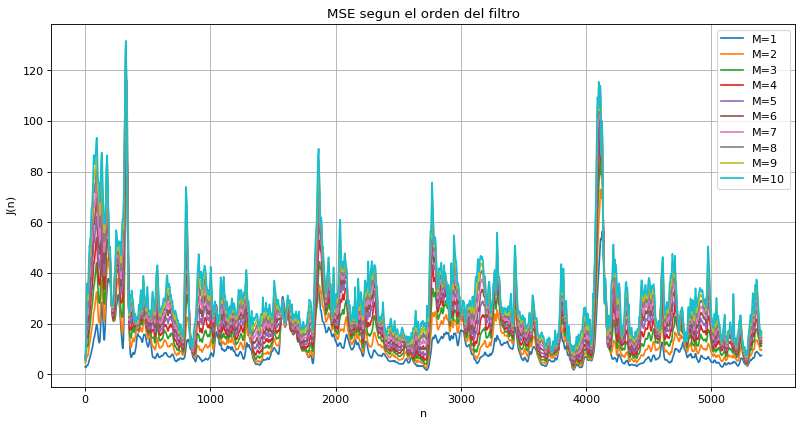

In [166]:
selected_mu = 1e-7
M_values = np.linspace(start=1,stop=10, num=10, dtype = int)
var_array = np.zeros(M_values.shape)
js = np.zeros( (54,5401) )
j_list = np.zeros( (len(M_values),5401))
print(j_list.shape)
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el orden del filtro')
plt.grid('on')

for j in range(0,len(M_values)):
  M_test = M_values[j]
  filter1 = FilterLMS(m=M_test, mu=selected_mu)
  filter2 = FilterLMS(m=M_test, mu=selected_mu)
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.sum(axis=0) / len(cont_data_list)
  plt.plot(j_list[j], label="M="+str(M_test))
plt.legend()
plt.show()

### Tracking de coeficientes

In [ ]:
#Mediciones
contaminated_signal = cont_data_list[0][0].astype(np.float64) 
veog_signal = veog_list[0][0].astype(np.float64) 
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))
#Parametros
selected_mu = 1e-7
M = 1
w = np.zeros((len(contaminated_signal),M+1))

filter1 = FilterLMS(m=M, mu=selected_mu)
filter2 = FilterLMS(m=M, mu=selected_mu)
for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]
  w[k] = filter1.w

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[k] =   eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[k])
  filter2.adapt( e=clean_estimation[k])
  
print(w[:,0])
plt.plot(w[:,0])